### Imports Necessary Modules

In [2]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### Load the Dataset

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target 
target_names = iris.target_names

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (150, 4)
Shape of y: (150,)


### Visualize the dataset

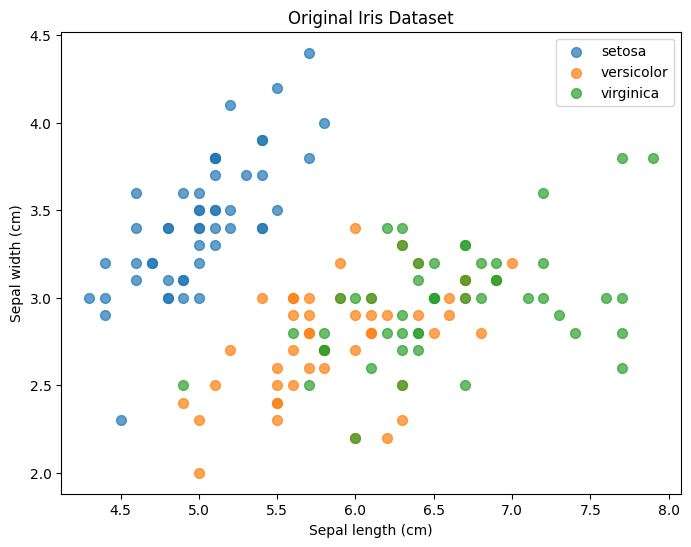

In [4]:
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X.iloc[y == i, 0], X.iloc[y == i, 1], label=target_name, alpha=0.7, s=50)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Original Iris Dataset")
plt.legend()
plt.show()

### Explained Variance of PCA

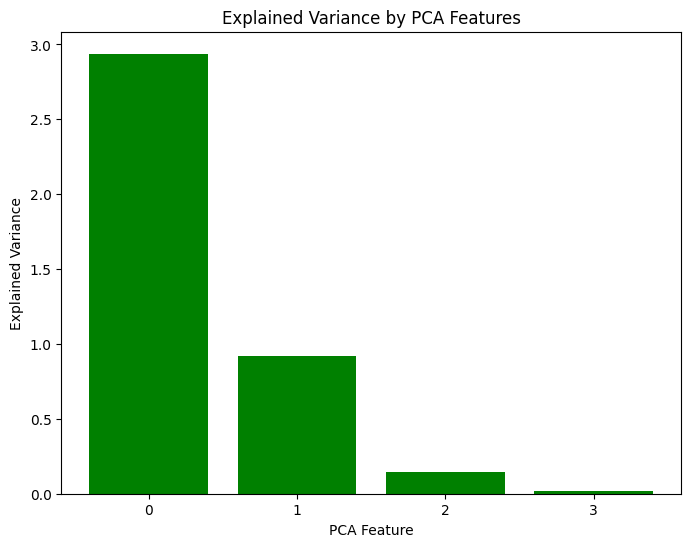

In [5]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Plot Explained Variance
features = range(pca.n_components_)
plt.figure(figsize=(8, 6))
plt.bar(features, pca.explained_variance_, color="green")
plt.xlabel("PCA Feature")
plt.ylabel("Explained Variance")
plt.title("Explained Variance by PCA Features")
plt.xticks(features)
plt.show()

### PCA for 2D visualization

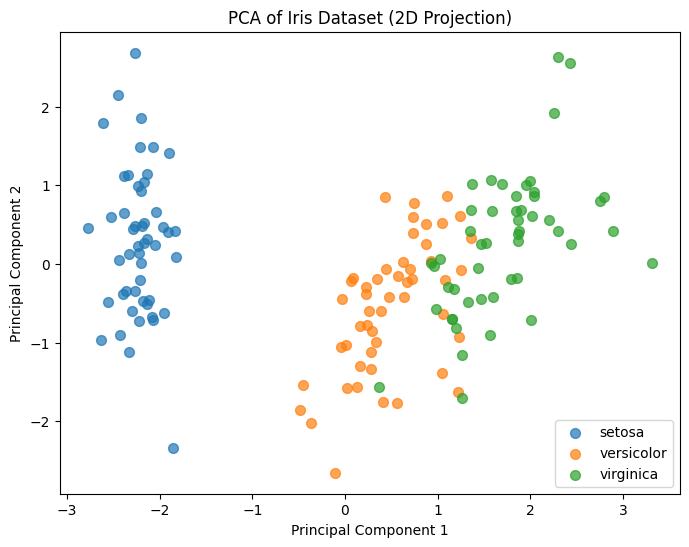

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7, s=50)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (2D Projection)")
plt.legend()
plt.show()


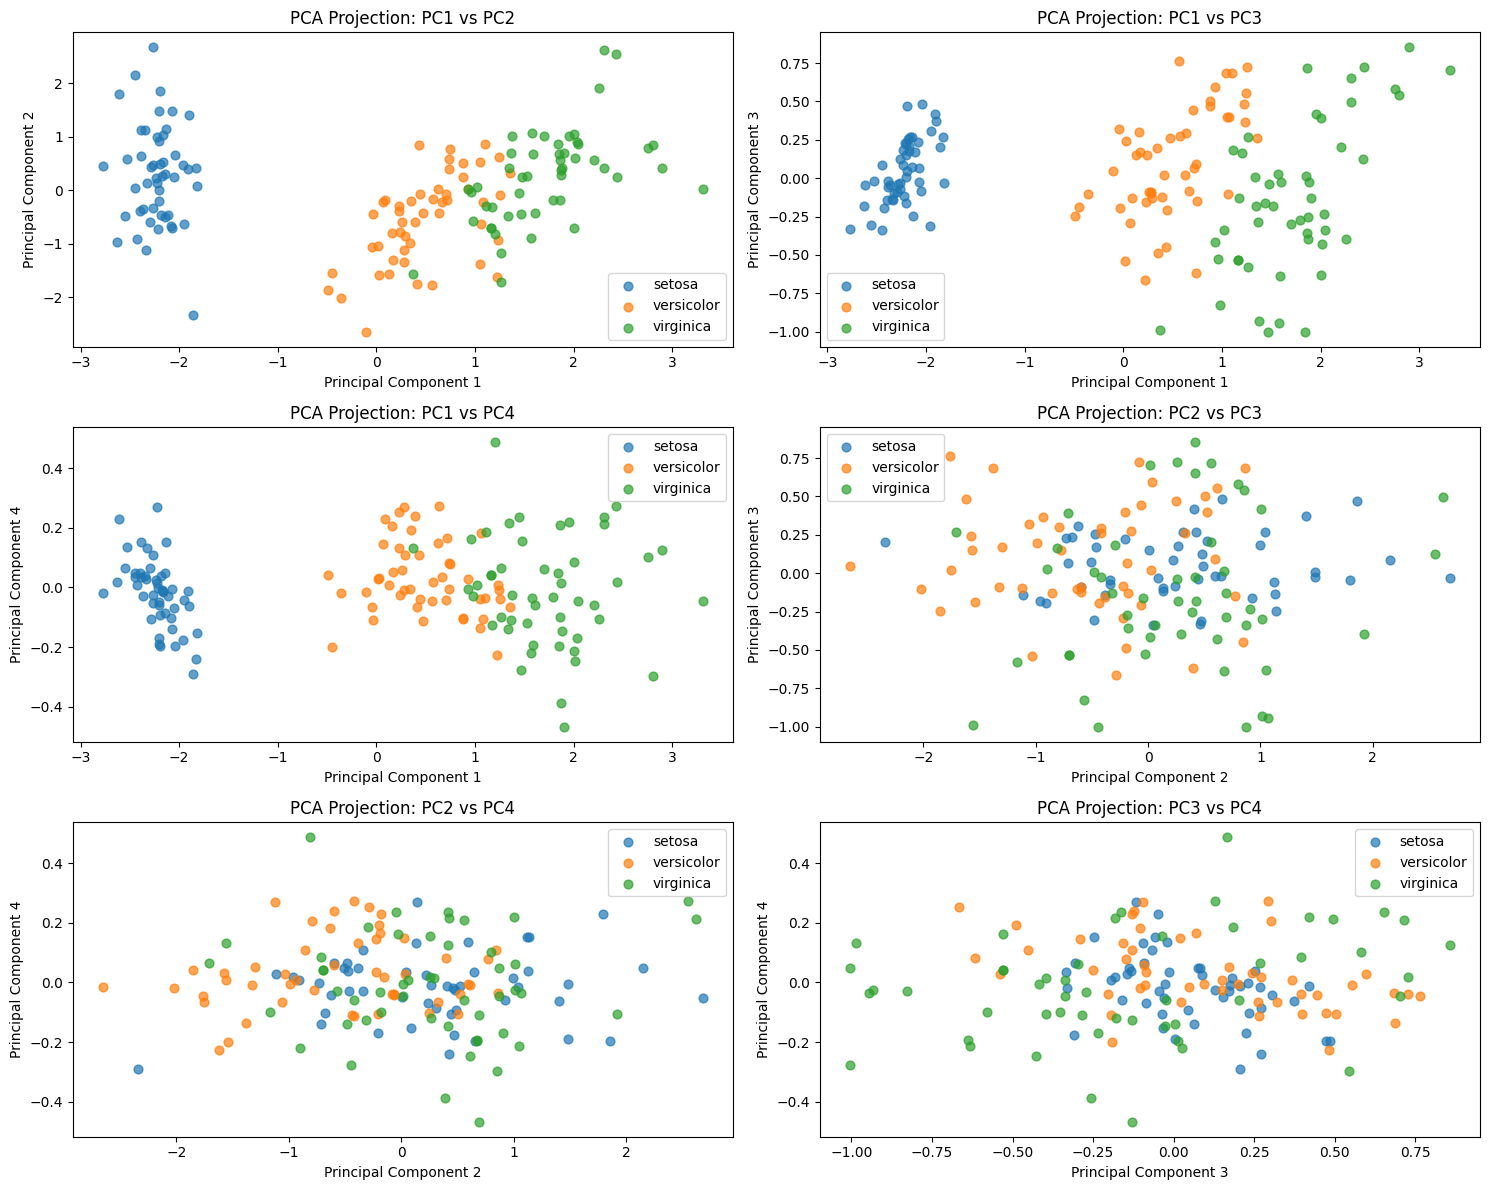

In [ ]:
# Plot all pair of principal components
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# All pairs of components
pairs = list(itertools.combinations(range(4), 2))

plt.figure(figsize=(15, 12))

for idx, (i, j) in enumerate(pairs, 1):
    plt.subplot(3, 2, idx)
    for k, target_name in enumerate(target_names):
        plt.scatter(X_pca[y == k, i], X_pca[y == k, j], label=target_name, alpha=0.7, s=40)
    plt.xlabel(f"Principal Component {i+1}")
    plt.ylabel(f"Principal Component {j+1}")
    plt.title(f"PCA Projection: PC{i+1} vs PC{j+1}")
    plt.legend()

plt.tight_layout()
plt.show()

### PCA for 3D visualization

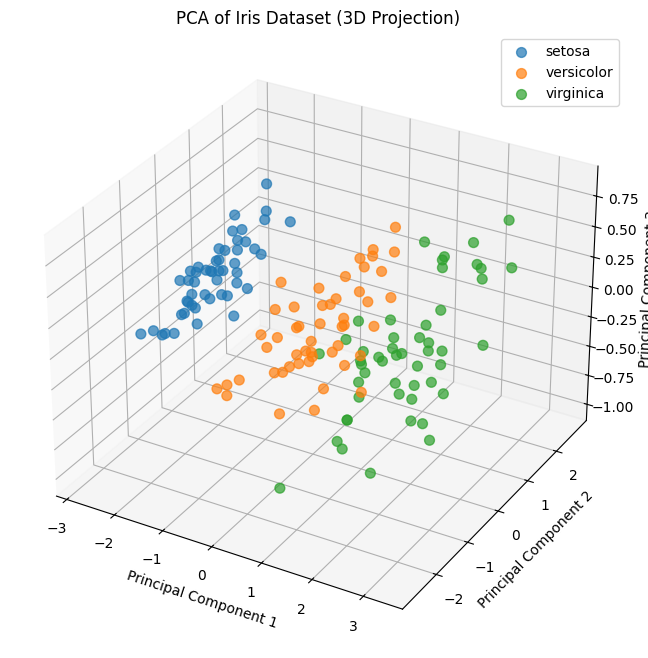

Explained variance ratio (3 components): [0.72962445 0.22850762 0.03668922]


In [8]:
from mpl_toolkits.mplot3d import Axes3D 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, target_name in enumerate(target_names):
    ax.scatter(X_pca_3d[y == i, 0], X_pca_3d[y == i, 1], X_pca_3d[y == i, 2], label=target_name, s=50, alpha=0.7)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA of Iris Dataset (3D Projection)")
ax.legend()
plt.show()

# Print explained variance for the first 3 components
print("Explained variance ratio (3 components):", pca_3d.explained_variance_ratio_)
